# Module 8 Exercise - Data Storytelling

In this exercise, you will **create a narrative visualization with a data set of your choosing**. You can choose any data set you can find on the Internet or a data set related to your current line of work. 

**You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course.**

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 

2. Write your R code **in this exercise notebook** to create your visualizations, and save them under the `exercises` folder.

3. Create a **narrative visualization document** using **any** software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 

4. Save your end product as a **pdf file** and upload it to your exercises folder (**name it L8_Exercise.pdf**)

Make sure that you start with a clear message in mind, and filter and format your data accordingly, and create the visualizations that will **support that message**. 

You need to have **at least one major visualization, and a number of supporting smaller graphs (2, 3, or more)**. Make sure to have a **clean layout**, and **enough text annotations and captions** to make your message clear. 

You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

You will be graded by the quality of your visualizations and storytelling; **make sure to use everything you have learned in this course.** 

This exercise is about creating a quickly consumable product; Do **NOT** create a report or lengthy power point presentation. You can choose a poster format or few slides to tell your story (a unique angle) for the data set you have chosen. 

---

Following is to show how to plot to a file to save a graph:

In [1]:
# this is how you save a plot to a file
#library(ggplot2)

# comment this out to see the plot in the notebook 
#png(filename="myplot.png")

# your plot here..
#qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
#dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

**Activity:**

In [2]:
# Load packages & libraries
library(dplyr)
#install.packages("tidyverse")
library(tidyverse)
library(ggplot2)
library(plotly)
library(RColorBrewer)
library(gridExtra)
#install.packages("anchors")
library("anchors")
#install.packages("forcats")
library("forcats")
# Read your data here; 


# Clean it up, reformat it, filter it, sort it, group it, etc.
# # Read R data into R
# myData <- readRDS("shr_1976_2020.rds")
# # Read STATA file into R
# myData <- read_dta('shr_1976_2020.dta')
# Read csv file into R
myData <- read.csv("us_gun_deaths_2000_2019.csv")
head(myData)

## Replace black with African American
# Change data type to character first
myData$ethnicity <- as.character(myData$ethnicity)
myData[myData == "Black"] <- "African American"
#myData

## Split dataframe into useful subsets
# Split into numerical set and factor set removing instances of zero deaths
corrData <- myData[!(myData$deaths == 0), c("year", "age_code", "gender_code", "ethnicity_code", "deaths")]
myData <- myData[!(myData$deaths == 0), c("year", "age", "gender", "ethnicity" ,"deaths")]

# Show dataframes
head(corrData)
head(myData)

# Check for NAs
colSums(is.na(myData))

colSums(is.na(corrData))

# Dataset looks clean, no NULLs and data types are correct

# # Get rid of rows with zero deaths
# myData <- myData[!(corrData$deaths == 0),]
# corrData <- corrData[!(corrData$deaths == 0),]
# #myData
# #corrData

# Split into two largest ethnicities
black <- subset(myData, ethnicity == "African American")
white <- subset(myData, ethnicity == "White")
#black
#white

bwData <- subset(myData, ethnicity == "African American" | ethnicity == "White")
#bwData

# Split into total deaths by year
annualData <- aggregate(myData$deaths, by = list(year = myData$year), FUN = sum)
#annualData

# Split into youngest ages
young <- subset(myData, age == "Under 5" | age == "6 to 11" | age == "12 to 14" | age == "15 to 17")
#young

# Split into youngest ages of African American and White deaths
youngBW <- subset(young, ethnicity == "African American" | ethnicity == "White")
#youngBW

# Get mean deaths by youth age group
youngData <- young %>%
    group_by(year, age) %>%
    summarize(mean(deaths), sd(deaths))

# Get mean deaths by year
summData <- myData %>% 
        group_by(year) %>% 
        summarise(mean_deaths = mean(deaths))

# Get mean deaths by age
ageData <- myData %>%
    group_by(year, age) %>%
    summarize(mean(deaths), sd(deaths))

# Get mean deaths by ethnicity
ethData <- myData %>%
    group_by(year, ethnicity) %>%
    summarize(mean(deaths), sd(deaths))

# Get mean deaths by gender
genData <- myData %>%
    group_by(year, gender) %>%
    summarize(mean(deaths), sd(deaths))

# Get mean deaths by black and white youths
bwYouthData <- youngBW %>%
    group_by(year, age) %>%
    summarize(mean(deaths), sd(deaths))


### Data exploration ###
print("Full dataframe:")
summary(myData)
print("African American deaths dataframe:")
summary(black)
print("White deaths dataframe:")
summary(white)
print("African American and white deaths dataframe:")
summary(bwData)
print("Deaths by year dataframe:")
summary(annualData)
print("Youth dataframe:")
summary(young)
print("Black and white youths dataframe:")
summary(youngBW)

# Get a feel for the data
myData %>%
    group_by(ethnicity) %>%
    summarize(meanDeaths = mean(deaths), medianDeaths = median(deaths))

myData %>%
    group_by(age) %>%
    summarize(meanDeaths = mean(deaths), medianDeaths = median(deaths))

myData %>%
    group_by(gender) %>%
    summarize(meanDeaths = mean(deaths), medianDeaths = median(deaths))

# myData %>%
#     group_by(year, ethnicity) %>%
#     summarize(meanDeaths = mean(deaths), medianDeaths = median(deaths))

# myData %>%
#     group_by(year, gender) %>%
#     summarize(meanDeaths = mean(deaths), medianDeaths = median(deaths))

# myData %>%
#     group_by(year, age) %>%
#     summarize(meanDeaths = mean(deaths), medianDeaths = median(deaths))

myData %>%
    group_by(ethnicity) %>%
    top_n(n = 1, wt = deaths)

myData %>%
    group_by(age) %>%
    top_n(n = 1, wt = deaths)

# Check correlations
ethCorr = cor(corrData$ethnicity_code, corrData$deaths)
genCorr = cor(corrData$gender_code, corrData$deaths)
ageCorr = cor(corrData$age_code, corrData$deaths)

cat(sprintf("Correlation between gun deaths and ethnicity is (%f), gender (%f), and age (%f)", ethCorr, genCorr, ageCorr))

# There does not seem to be a very strong correlation between gun deaths and any of the factors, which is surprising

# Explore data visually
histogram <- ggplot(data = myData, aes(deaths)) + 
    geom_histogram(bins = 55)

ethHistogram <- ggplot(myData, aes(deaths, fill = ethnicity)) +
    geom_histogram(binwidth = 90)

youthHistogram<- ggplot(myData, aes(deaths, fill = age)) +
    geom_histogram(binwidth = 90) + 
    theme(legend.position = "bottom")

grid.arrange(histogram, ethHistogram, youthHistogram,
             layout_matrix = matrix(c(1, 3, 
                                      2, 2), 
                                    byrow = TRUE, ncol = 2))
             #layout_matrix = matrix(c(1, 2), ncol = 2))

# There are so many single deaths there is no way to get coherent line plots of the raw numbers

# Compare male and female vs total
full <- myData
partial <- full[, -2]

ggplot(full, aes(x = deaths)) + 
  geom_histogram(data = partial, fill = "grey", alpha = .5, bins = 30) + 
  geom_histogram(aes(fill = gender), binwidth = 50) + 
  facet_wrap(~ gender) + 
  guides(fill = FALSE)

## Compare mean deaths to annual deaths
summLine <- ggplot(data = summData, aes(x = year, y = mean_deaths, )) +
    geom_line(color = "blue")

annualLine <- line_plot <- ggplot(data = annualData, aes(x = year, y = x)) +
    geom_line(color = "red")

grid.arrange(summLine, annualLine,
             layout_matrix = matrix(c(1, 2), ncol = 2))

# They seem to correlate, which is good
# Big drop and bigger increase around 2014. It would be interesting to research why

## View age data
age_line_plot <- ggplot(data = ageData, aes(x = year, y = `mean(deaths)`, color = age)) +
    geom_line()

age_line_plot

## 18 to 24 and 25 to 49 are flattenning the younger age groups

## Get a better look at the younger age groups
young_line_plot <- ggplot(data = youngData, aes(x = year, y = `mean(deaths)`, color = age)) +
    geom_line()

young_line_plot

## Looks like Under 5 and 6 to 11 may have trended up, while the others seem lower or maybe flat

# Look at overall trend
young_bar_plot <- ggplot(data = youngData, aes(x = year, y = `mean(deaths)`)) +
    geom_bar(mapping = aes(x = year, y = `mean(deaths)`, fill = age), stat = "identity", position='dodge') +
    geom_smooth(method = "lm")

young_bar_plot

# Overall trending down though

## Look at ethnicity
eth_line_plot <- ggplot(data = ethData, aes(x = year, y = `mean(deaths)`, color = ethnicity)) +
    geom_line()

eth_line_plot

# Black death are on the rise, white deaths are declining and asian and native american deaths are fairly flat
# Provbably only need to look at white and black

## Look at gender
gen_line_plot <- ggplot(data = genData, aes(x = year, y = `mean(deaths)`, color = gender)) +
    geom_line()

gen_line_plot

# Not really surprising to see the disparity in both numbers and trend

## Look at male and female by age and year
ggplot(myData, aes(x = age, y = deaths, fill = gender)) + 
geom_bar(data = subset(myData, gender == "Female"), stat = "identity") + 
geom_bar(data = subset(myData, gender == "Male"), stat = "identity", aes(y = -deaths)) + 
facet_wrap(~year) + 
coord_flip() + 
# Order the axis
scale_x_discrete(limits = c("Under 5","6 to 11","12 to 14","15 to 17","18 to 24","25 to 49", 
                                "50+"))

ggplot(myData, aes(x = age, y = deaths, fill = gender)) + 
geom_bar(data = subset(myData, gender == "Female"), stat = "identity") + 
geom_bar(data = subset(myData, gender == "Male"), stat = "identity", aes(y = -deaths)) + 
facet_wrap(~ethnicity) + 
coord_flip() + 
# Order the axis
scale_x_discrete(limits = c("Under 5","6 to 11","12 to 14","15 to 17","18 to 24","25 to 49", 
                                "50+"))

ggplot(myData, aes(x = age, y = deaths, fill = ethnicity)) + 
geom_bar(data = subset(myData, gender == "Female"), stat = "identity") +
geom_bar(data = subset(myData, gender == "Male"), stat = "identity", aes(y = -deaths)) +
coord_flip()

scale_y_continuous(labels = abs)

# Create your visualizations and save them as png files, then prepare your final pdf document elsewhere
# <- ALL YOUR CODE HERE ->
# Function to load theme elements
myTheme <- function() {
      
    # Generate the colors for the chart procedurally with RColorBrewer
    palette <- brewer.pal("Greys", n = 9) # create a palette of shades of grey 
    color.background = palette[1] # background plot color
    color.grid.major = palette[3] 
    color.grid.minor = palette[2]
    color.axis.text = palette[6] # text color 
    color.axis.title = palette[7]
    color.title = palette[9]

    # Begin construction of chart
    theme_bw(base_size = 9) +

    # Set the entire chart region to a light gray color
    theme(panel.background = element_rect(fill = color.background, color = color.background)) +
    theme(plot.background = element_rect(fill = color.background, color = color.background)) +
    theme(panel.border = element_rect(color = color.background)) +

    # Format the grid
    theme(panel.grid.major = element_line(color = color.grid.major,size = .25)) +
    theme(panel.grid.minor = element_blank()) +
    theme(axis.ticks = element_blank()) +

    # Format the legend, +++but hide by default
    theme(legend.position = "bottom") +
    #theme(legend.background = element_rect(fill = color.background)) +
    theme(legend.text = element_text(size = 7,color = color.axis.title)) +

    # Set title and axis labels, and format these and tick marks
    theme(plot.title = element_text(color = color.title, size = 12, vjust = 1.25)) +
    theme(axis.text.x = element_text(size = 9, color = color.axis.text)) +
    theme(axis.text.y = element_text(size = 9, color = color.axis.text)) +
    theme(axis.title.x = element_text(size = 10, color = color.axis.title, vjust = 0)) +
    theme(axis.title.y = element_text(size = 10, color = color.axis.title, vjust = 1.25)) +
    
    # Set facet attributes
    theme(strip.background = element_rect(fill = color.background, colour = color.background)) +
    theme(strip.text = element_text(size = 15, colour = color.axis.text)) +

    # Plot margins
    theme(plot.margin = unit(c(0.35, 0.2, 0.3, 0.35), "cm"))
}

# Create deaths by shool-aged children
young_line_plot <- ggplot(data = youngData, aes(x = year, y = `mean(deaths)`, color = age)) +
    geom_line(linetype = "dashed") +
    geom_point() +
    scale_color_brewer(palette = "Dark2") +
    geom_smooth(method = "lm", se = FALSE) +
    # 
    labs(title = 'Gun Deaths of Shcool-Age Children'
         ,y = 'Average Deaths'
         ,x = NULL
         ,color = 'Age Group'
         ,subtitle = str_c("Deaths decreased across youth categories with the exception,\n"
                           ,"of children younger than high school from 2000 to 2019")
    ) +
    myTheme()

young_line_plot

## Create deats by age category
age_line_plot <- ggplot(data = ageData, aes(x = year, y = `mean(deaths)`, color = age)) +
    geom_line(linetype = "dashed") +
    geom_point() +
    scale_color_brewer(palette = "Dark2") +
    geom_smooth(method = "lm", se = FALSE) +
    # 
    labs(title = 'Gun Deaths of Americans by Age'
         ,y = 'Average Deaths'
         ,x = NULL
         ,color = 'Age Group'
         ,subtitle = str_c("More than half of age groups saw gun-related deaths increase from 2000 to 2019")
    ) +
    myTheme()

age_line_plot

## Create deaths by ethnicity
eth_line_plot <- ggplot(data = youngBW, aes(x = year, y = `mean(deaths)`, color = ethnicity)) +
    geom_line(linetype = "dashed") +
    geom_point() +
    scale_color_brewer(palette = "Set1") +
    geom_smooth(method = "lm", se = FALSE) +
    labs(title = 'US Gun Deaths by Ethnicity'
         ,y = 'Average Deaths'
         ,x = NULL
         ,color = 'Age Group'
         ,subtitle = str_c("Deaths decreased or were relatively flat across all ethnicities between 2000-2019,\n"
                           ,"with the exception of African Americans")
         ,caption = "*Dataset treats Hispanic as a subset of ethnicity"
    ) +
    myTheme()

eth_line_plot

# Create stacked bar chart of ethnicity
perc_eth_deaths <- ggplot(ethData, aes(x = year, fill = ethnicity)) + 
    geom_col(aes(y = `mean(deaths)`), position = "fill", alpha = 0.65) + 
    coord_flip() + 
    scale_color_brewer(palette = "Set1",
                       name="Age Group",
                       direction = 1,
                       aesthetics = "fill") +
    labs(title = 'Ethnic Percentage of Gun Deaths in America'
         ,y = NULL
         ,x = NULL
         ,subtitle = str_c("The overwhelming number of Americans killed between 2000 and 2019,\n"
                           ,"were African American or white")
         ,caption = "*Dataset treats Hispanic as a subset of ethnicity"
    ) + 
    scale_y_continuous(labels = c("0%", "25%", "50%", "75%", "100%")) + 
    myTheme()

perc_eth_deaths

# Create deaths by ethnicity and gender
eth_deaths <- ggplot(bwData, aes(x = age, y = deaths, fill = gender)) + 
    geom_bar(data = subset(bwData, gender == "Female"), stat = "identity", alpha = 0.65) + 
    geom_bar(data = subset(bwData, gender == "Male"), stat = "identity", aes(y = -deaths), alpha = 0.65) + 
    facet_wrap(~ethnicity) + 
    geom_abline(slope=0) +
    coord_flip() + 
    # Order the axis
    scale_x_discrete(limits = c("Under 5","6 to 11","12 to 14","15 to 17","18 to 24","25 to 49", 
                                "50+")) + 
    scale_y_continuous(labels = abs) + 
    scale_fill_manual(values = as.vector(c("red", "blue"))) +
    labs(title = 'Gun Deaths in America'
         ,y = 'Average Deaths'
         ,x = 'Age Group'
         ,fill = 'Gender'
         ,subtitle = str_c("Gun deaths between 2000 and 2019 among the largest ethnicities\n"
                           ,"show similar trends between both age and gender")
         ,caption = "*Dataset treats Hispanic as a subset of ethnicity"
    ) +
    myTheme()

eth_deaths

# Create youth deaths by majority ethniticies and gender
youth_eth_deaths <- ggplot(youngBW, aes(x = age, y = deaths, fill = gender)) + 
    geom_bar(data = subset(youngBW, gender == "Female"), stat = "identity", alpha = 0.65) + 
    geom_bar(data = subset(youngBW, gender == "Male"), stat = "identity", aes(y = -deaths), alpha = 0.65) + 
    facet_wrap(~ethnicity) + 
    geom_abline(slope=0) +
    coord_flip() + 
    # Order the axis
    scale_x_discrete(limits = c("Under 5", "6 to 11", "12 to 14", "15 to 17")) + 
    scale_y_continuous(labels = abs) + 
    scale_fill_manual(values = as.vector(c("red", "blue"))) +
    labs(title = 'Youth Gun Deaths in America'
         ,y = 'Average Deaths'
         ,x = 'Age Group'
         ,fill = 'Gender'
         ,subtitle = str_c("Youth gun deaths between 2000 and 2019 show majority to continue to be male,\n"
                           ,"with African Americans outpacing white children")
         ,caption = "*Dataset treats Hispanic as a subset of ethnicity"
    ) +
    myTheme()

youth_eth_deaths

# Create overall trend
young_bar_plot <- ggplot(data = youngData, aes(x = year, y = `mean(deaths)`)) +
    geom_bar(mapping = aes(x = year, y = `mean(deaths)`, fill = age), stat = "identity", position = 'dodge') + 
    scale_color_brewer(palette = "Dark2") + 
    geom_smooth(method = "lm") +
    labs(title = 'Gun Deaths by Youth Age Groups'
         ,y = 'Average Deaths'
         ,x = 'Year'
         ,fill = 'Age Group'
         ,subtitle = str_c("In total, deaths decreased in school-aged,\n"
                           ,"children between 2000-2019")
    ) +
    myTheme()

young_bar_plot

# Create pngs 
png(filename="young_line_plot.png")
young_line_plot
dev.off()

png(filename="eth_line_plot.png")
eth_line_plot
dev.off()

png(filename="perc_eth_deaths.png")
perc_eth_deaths
dev.off()

png(filename="eth_deaths.png")
eth_deaths
dev.off()

png(filename="youth_eth_deaths.png")
youth_eth_deaths
dev.off()

png(filename="young_bar_plot.png")
young_bar_plot
dev.off()

png(filename="age_line_plot.png")
age_line_plot
dev.off()


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: rgenoud
##  rgenoud (Version 5.8-3.0, Build Date: 2019-01-22)
##  See http://sekhon.berkeley.

year,age,gender,ethnicity,deaths,age_code,gender_code,ethnicity_code
<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
2000,12 to 14,Male,Asian,1,2,0,0
2000,15 to 17,Male,Asian,5,3,0,0
2000,18 to 24,Male,Asian,32,4,0,0
2000,25 to 49,Male,Asian,53,5,0,0
2000,50+,Male,Asian,9,6,0,0
2000,6 to 11,Male,Asian,0,1,0,0


,year,age_code,gender_code,ethnicity_code,deaths
,<int>,<int>,<int>,<int>,<int>
1,2000,2,0,0,1
2,2000,3,0,0,5
3,2000,4,0,0,32
4,2000,5,0,0,53
5,2000,6,0,0,9
7,2000,0,0,0,1


,year,age,gender,ethnicity,deaths
,<int>,<fct>,<fct>,<chr>,<int>
1,2000,12 to 14,Male,Asian,1
2,2000,15 to 17,Male,Asian,5
3,2000,18 to 24,Male,Asian,32
4,2000,25 to 49,Male,Asian,53
5,2000,50+,Male,Asian,9
7,2000,Under 5,Male,Asian,1


year       age    gender ethnicity    deaths 
        0         0         0         0         0

year       age_code    gender_code ethnicity_code         deaths 
             0              0              0              0              0

[1] "Full dataframe:"


      year            age         gender     ethnicity             deaths      
 Min.   :2000   12 to 14:102   Female:430   Length:932         Min.   :   1.0  
 1st Qu.:2005   15 to 17:148   Male  :502   Class :character   1st Qu.:   4.0  
 Median :2010   18 to 24:160                Mode  :character   Median :  21.0  
 Mean   :2010   25 to 49:160                                   Mean   : 230.2  
 3rd Qu.:2015   50+     :160                                   3rd Qu.: 160.5  
 Max.   :2019   6 to 11 :100                                   Max.   :3461.0  
                Under 5 :102                                                   

[1] "African American deaths dataframe:"


      year            age        gender     ethnicity             deaths      
 Min.   :2000   12 to 14:40   Female:139   Length:279         Min.   :   3.0  
 1st Qu.:2004   15 to 17:40   Male  :140   Class :character   1st Qu.:  24.5  
 Median :2009   18 to 24:40                Mode  :character   Median :  77.0  
 Mean   :2009   25 to 49:40                                   Mean   : 443.5  
 3rd Qu.:2014   50+     :40                                   3rd Qu.: 477.5  
 Max.   :2019   6 to 11 :40                                   Max.   :3461.0  
                Under 5 :39                                                   

[1] "White deaths dataframe:"


      year            age        gender     ethnicity             deaths      
 Min.   :2000   12 to 14:40   Female:142   Length:282         Min.   :   2.0  
 1st Qu.:2005   15 to 17:40   Male  :140   Class :character   1st Qu.:  17.0  
 Median :2010   18 to 24:40                Mode  :character   Median :  52.0  
 Mean   :2010   25 to 49:40                                   Mean   : 305.9  
 3rd Qu.:2015   50+     :40                                   3rd Qu.: 347.0  
 Max.   :2019   6 to 11 :41                                   Max.   :2135.0  
                Under 5 :41                                                   

[1] "African American and white deaths dataframe:"


      year            age        gender     ethnicity             deaths      
 Min.   :2000   12 to 14:80   Female:281   Length:561         Min.   :   2.0  
 1st Qu.:2005   15 to 17:80   Male  :280   Class :character   1st Qu.:  19.0  
 Median :2010   18 to 24:80                Mode  :character   Median :  63.0  
 Mean   :2010   25 to 49:80                                   Mean   : 374.4  
 3rd Qu.:2015   50+     :80                                   3rd Qu.: 372.0  
 Max.   :2019   6 to 11 :81                                   Max.   :3461.0  
                Under 5 :80                                                   

[1] "Deaths by year dataframe:"


      year            x        
 Min.   :2000   Min.   : 9472  
 1st Qu.:2005   1st Qu.: 9936  
 Median :2010   Median :10660  
 Mean   :2010   Mean   :10728  
 3rd Qu.:2014   3rd Qu.:11395  
 Max.   :2019   Max.   :12463  

[1] "Youth dataframe:"


      year            age         gender     ethnicity             deaths      
 Min.   :2000   12 to 14:102   Female:190   Length:452         Min.   :  1.00  
 1st Qu.:2005   15 to 17:148   Male  :262   Class :character   1st Qu.:  3.00  
 Median :2010   18 to 24:  0                Mode  :character   Median :  7.00  
 Mean   :2010   25 to 49:  0                                   Mean   : 32.46  
 3rd Qu.:2015   50+     :  0                                   3rd Qu.: 30.00  
 Max.   :2019   6 to 11 :100                                   Max.   :340.00  
                Under 5 :102                                                   

[1] "Black and white youths dataframe:"


      year            age        gender     ethnicity             deaths     
 Min.   :2000   12 to 14:80   Female:161   Length:321         Min.   :  2.0  
 1st Qu.:2005   15 to 17:80   Male  :160   Class :character   1st Qu.:  6.0  
 Median :2010   18 to 24: 0                Mode  :character   Median : 22.0  
 Mean   :2010   25 to 49: 0                                   Mean   : 44.8  
 3rd Qu.:2015   50+     : 0                                   3rd Qu.: 38.0  
 Max.   :2019   6 to 11 :81                                   Max.   :340.0  
                Under 5 :80                                                  

ethnicity,meanDeaths,medianDeaths
<chr>,<dbl>,<dbl>
African American,443.548387,77
Asian,15.474886,6
Native American,7.532895,4
White,305.946809,52


age,meanDeaths,medianDeaths
<fct>,<dbl>,<dbl>
12 to 14,15.91176,7.0
15 to 17,71.97297,30.5
18 to 24,400.23125,121.5
25 to 49,703.95000,208.5
50+,145.12500,39.0
6 to 11,11.28000,5.0
Under 5,12.44118,6.0


gender,meanDeaths,medianDeaths
<fct>,<dbl>,<dbl>
Female,84.83488,7
Male,354.74502,29


year,age,gender,ethnicity,deaths
<int>,<fct>,<fct>,<chr>,<int>
2006,25 to 49,Male,Asian,102
2016,25 to 49,Male,African American,3461
2017,25 to 49,Male,Native American,45
2016,25 to 49,Male,White,2135


year,age,gender,ethnicity,deaths
<int>,<fct>,<fct>,<chr>,<int>
2006,12 to 14,Male,African American,63
2006,18 to 24,Male,African American,1773
2007,15 to 17,Male,African American,340
2016,25 to 49,Male,African American,3461
2016,Under 5,Male,African American,49
2017,50+,Male,African American,793
2019,6 to 11,Male,African American,49


Correlation between gun deaths and ethnicity is (0.097350), gender (-0.251320), and age (0.278402)

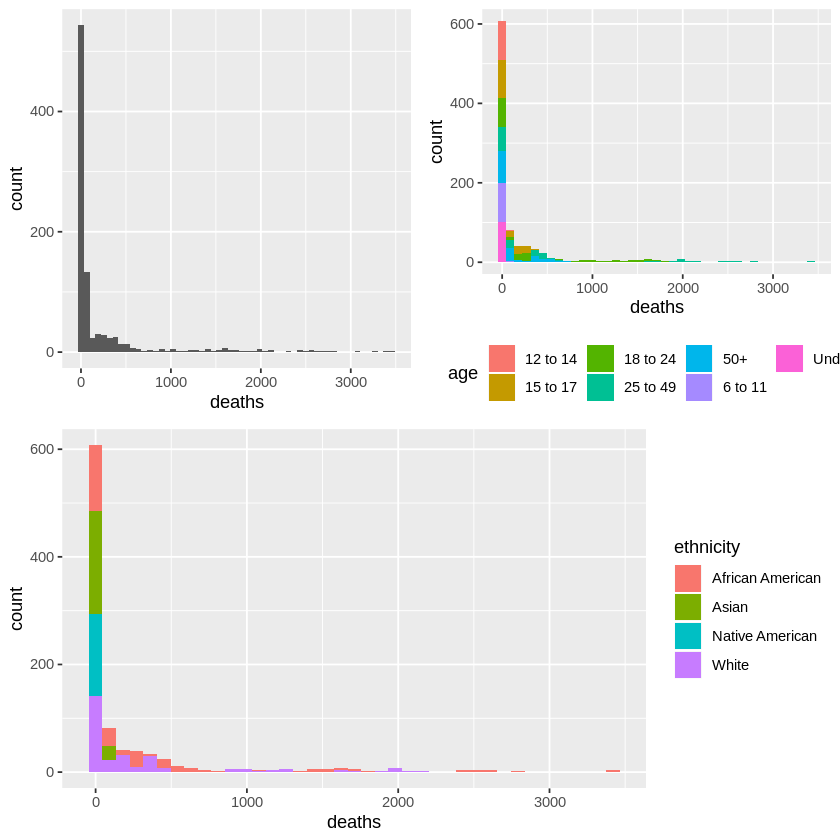

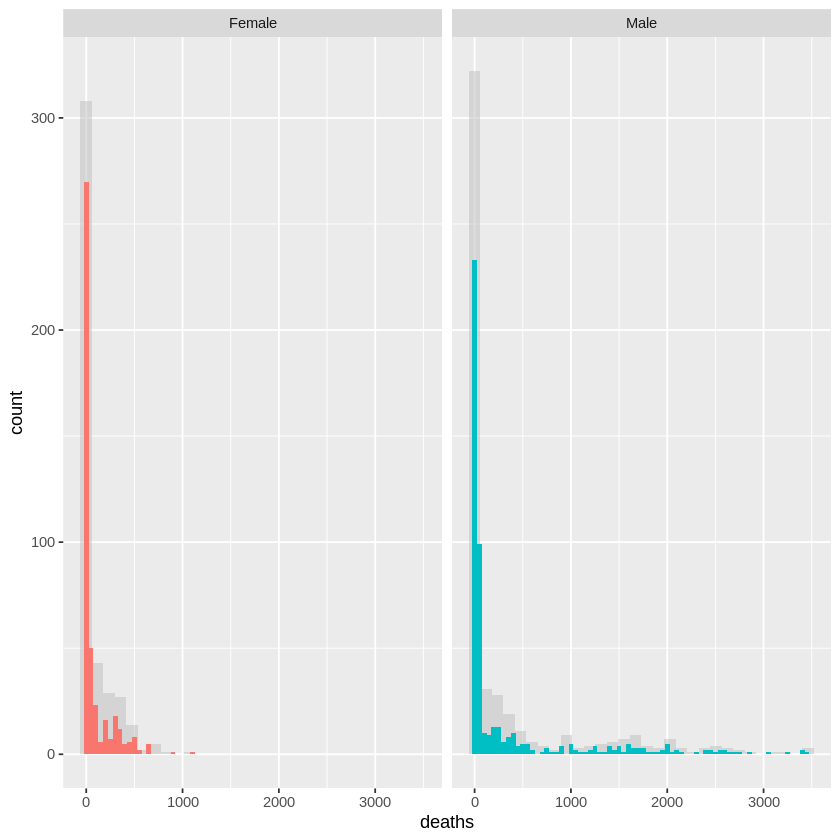

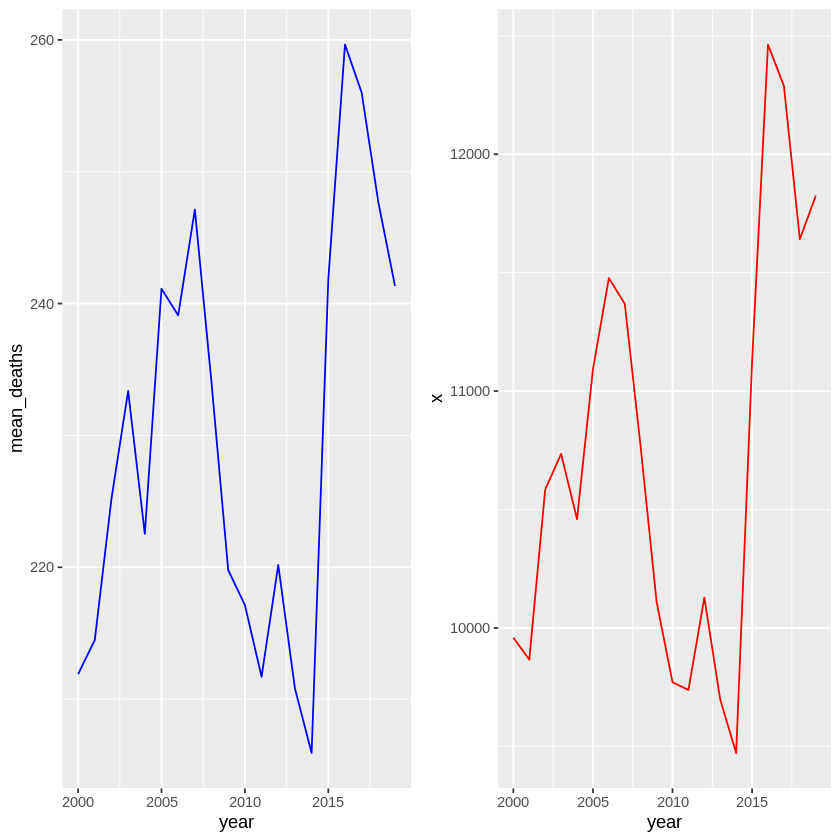

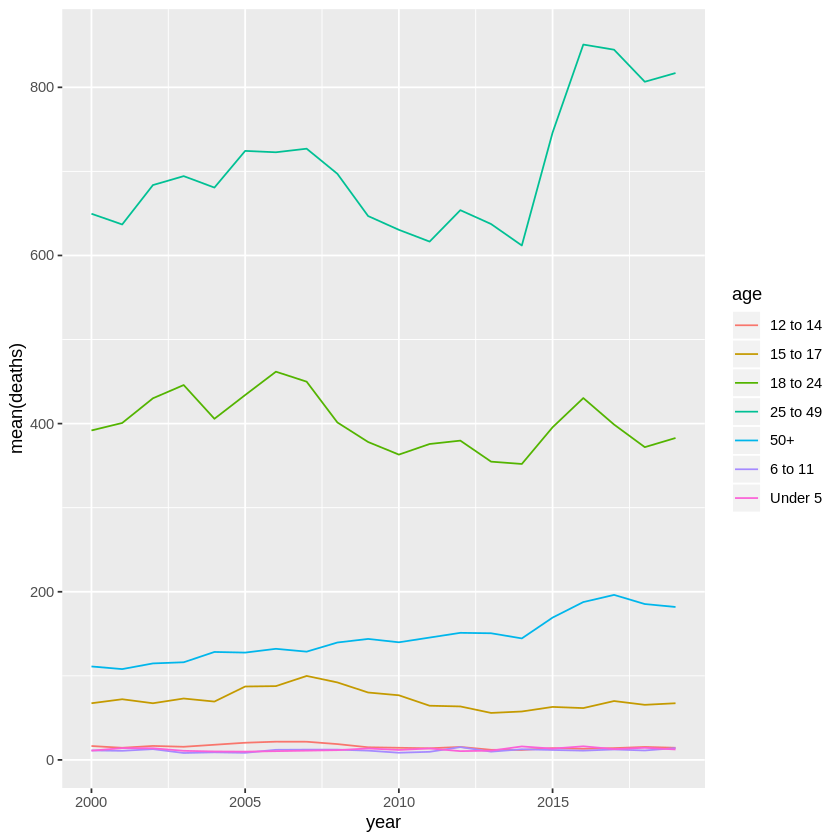

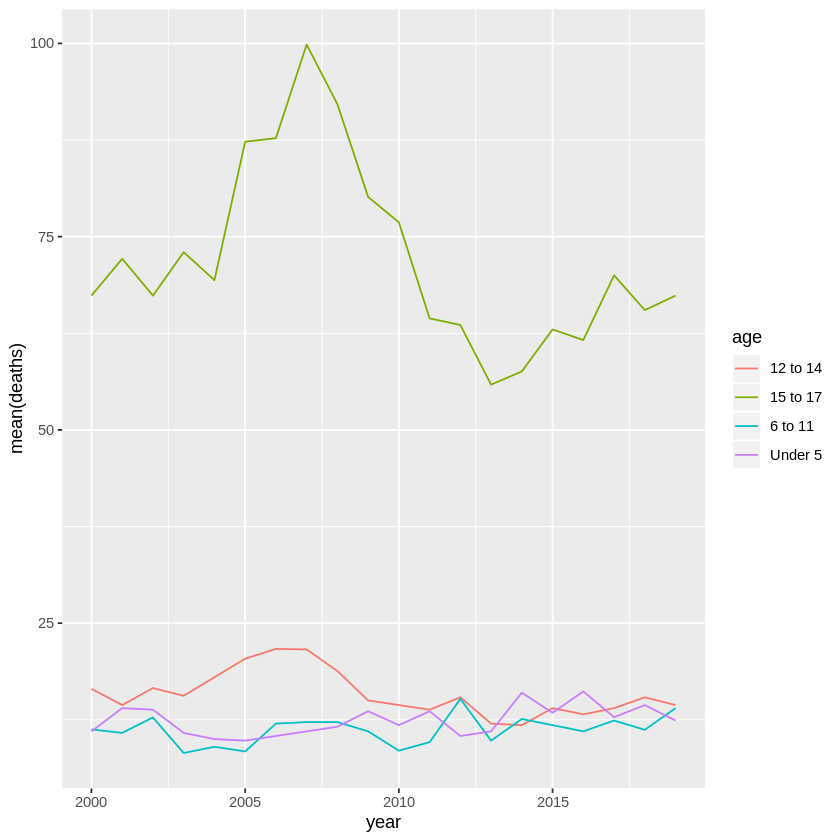

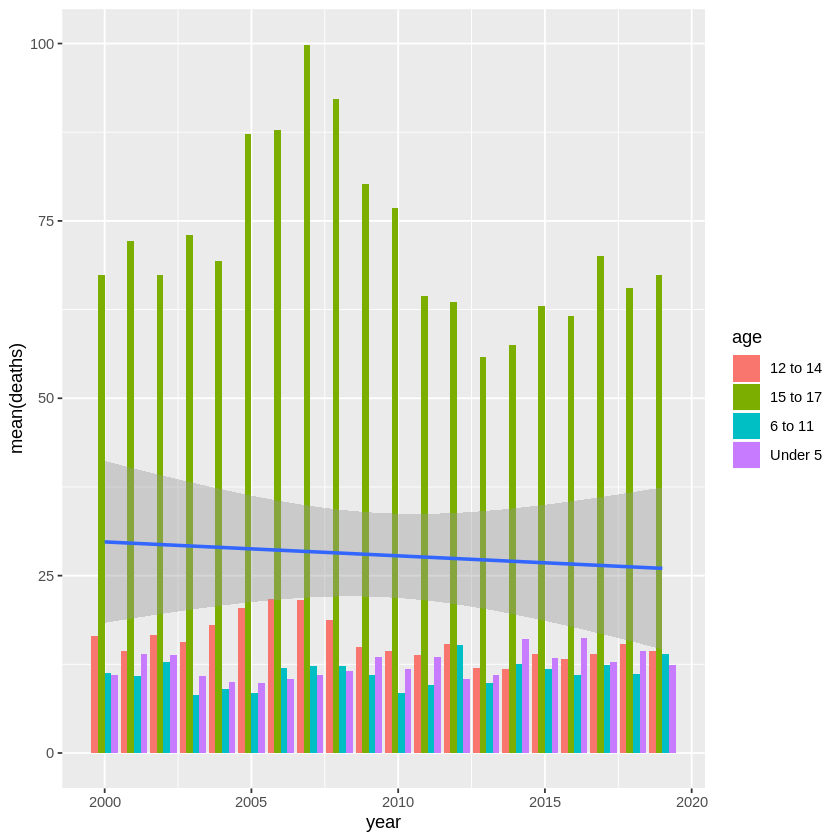

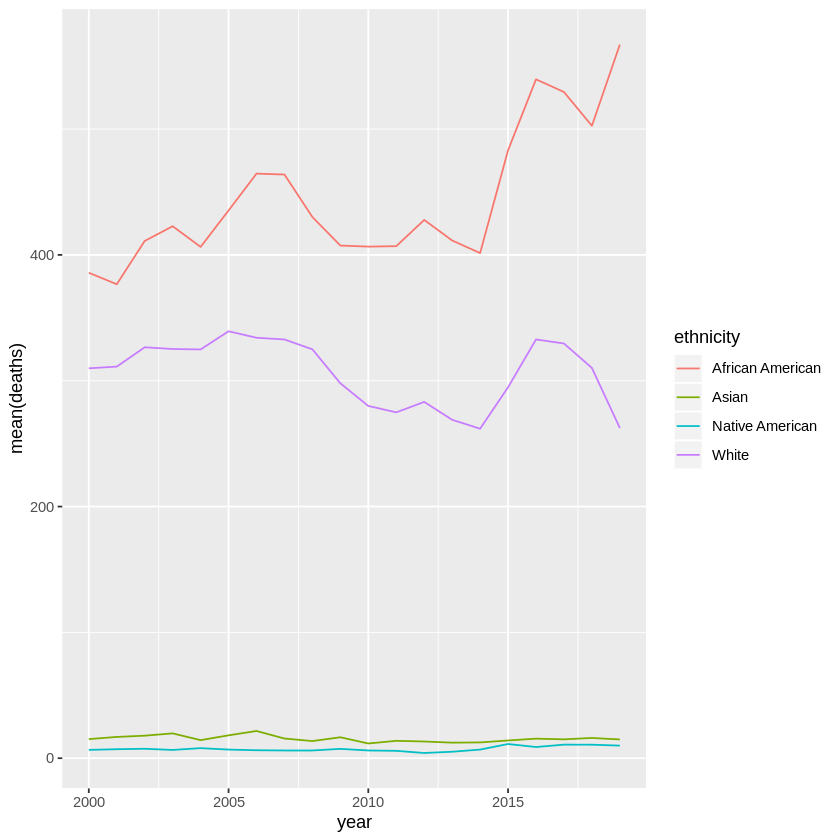

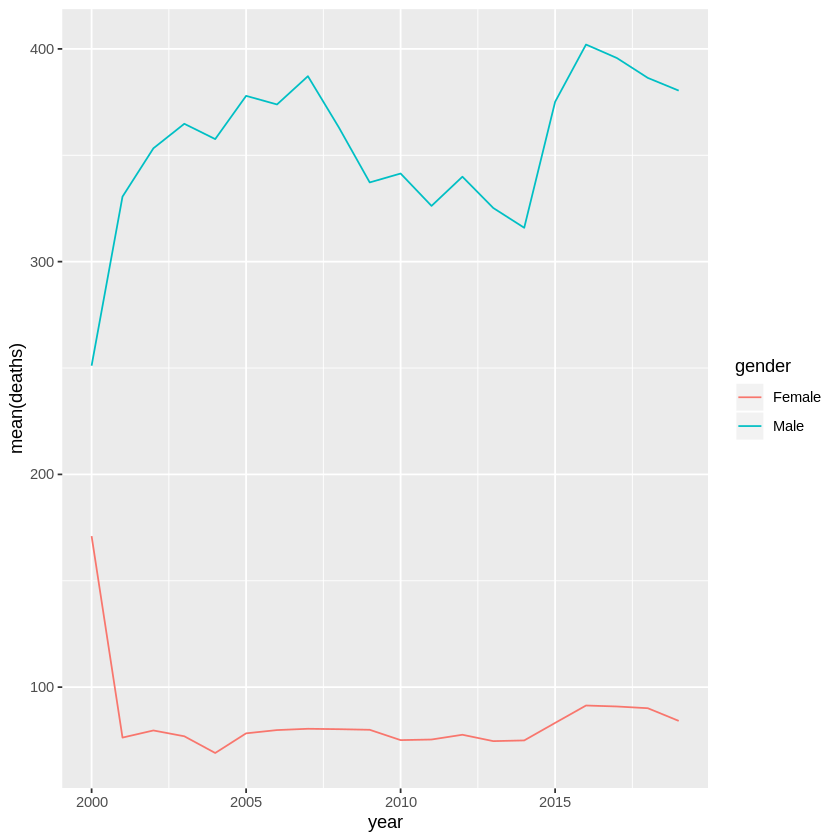

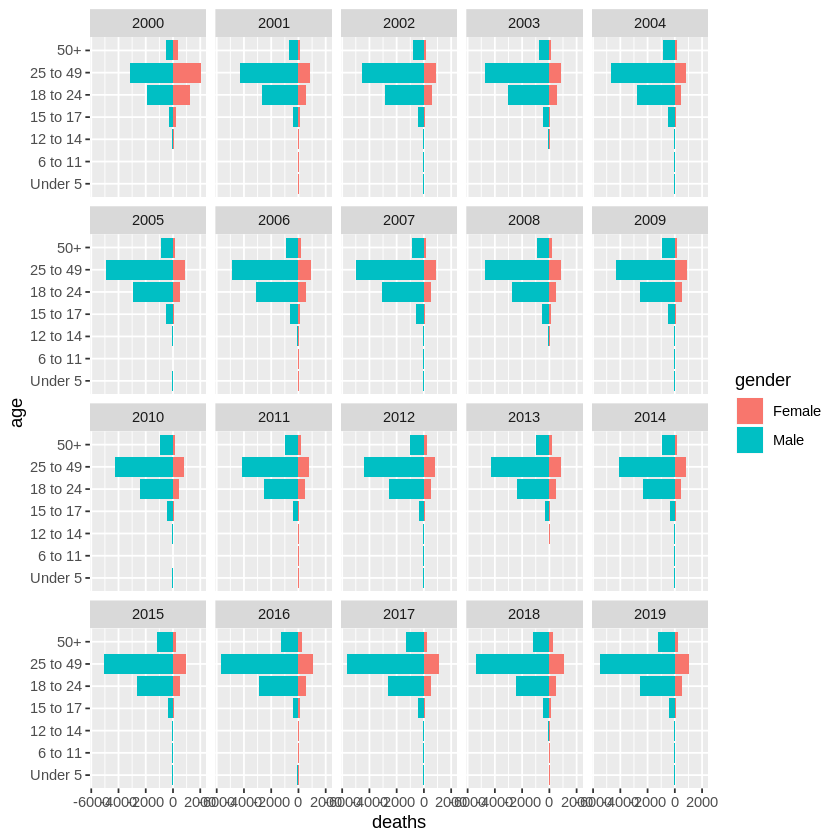

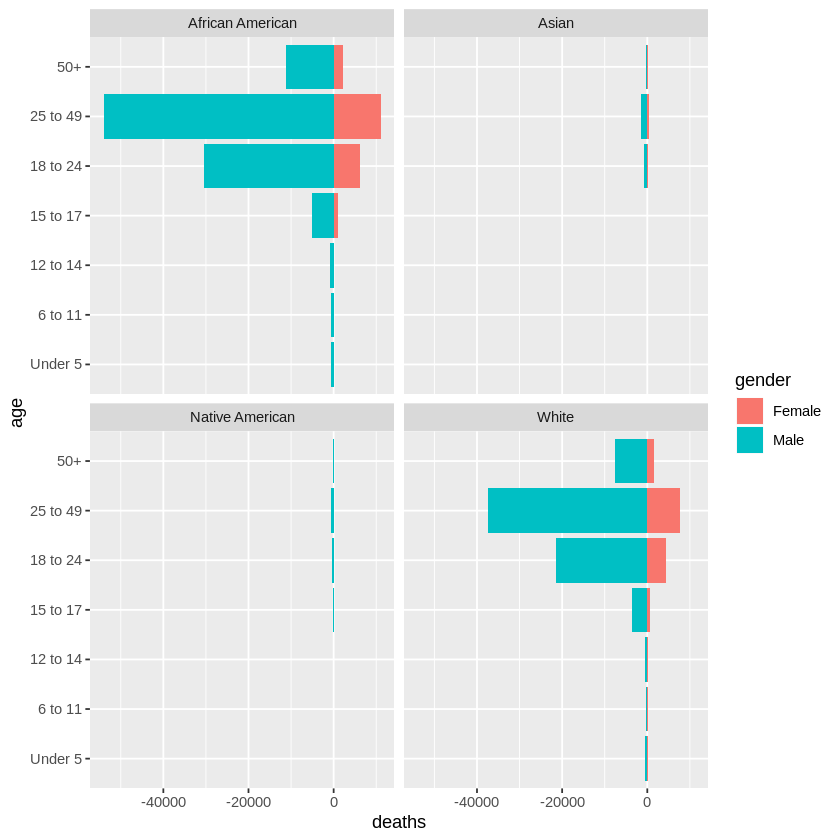

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

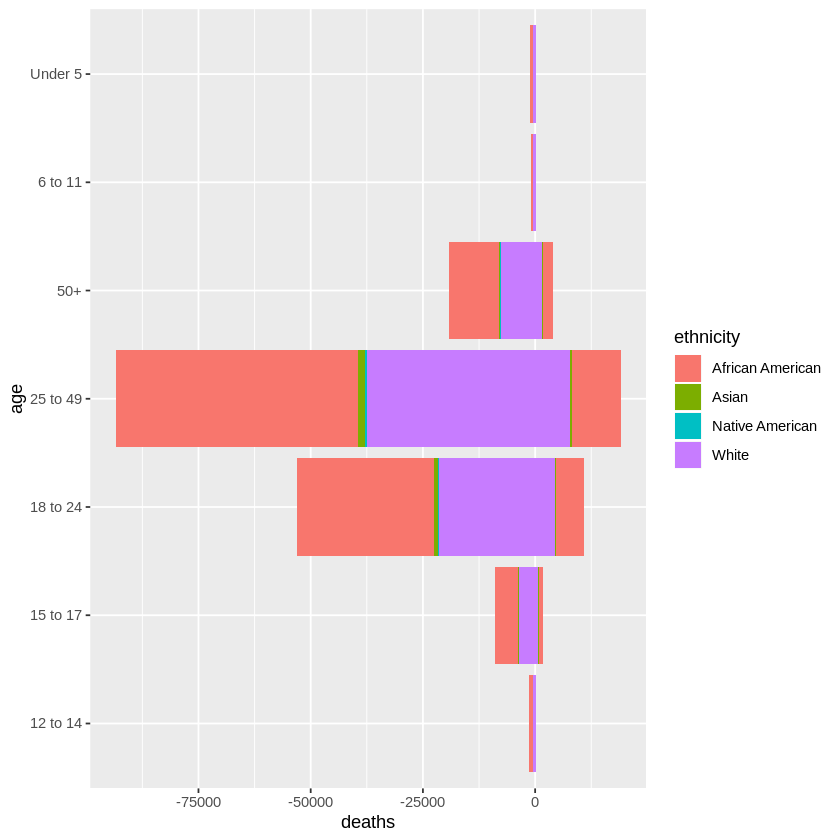

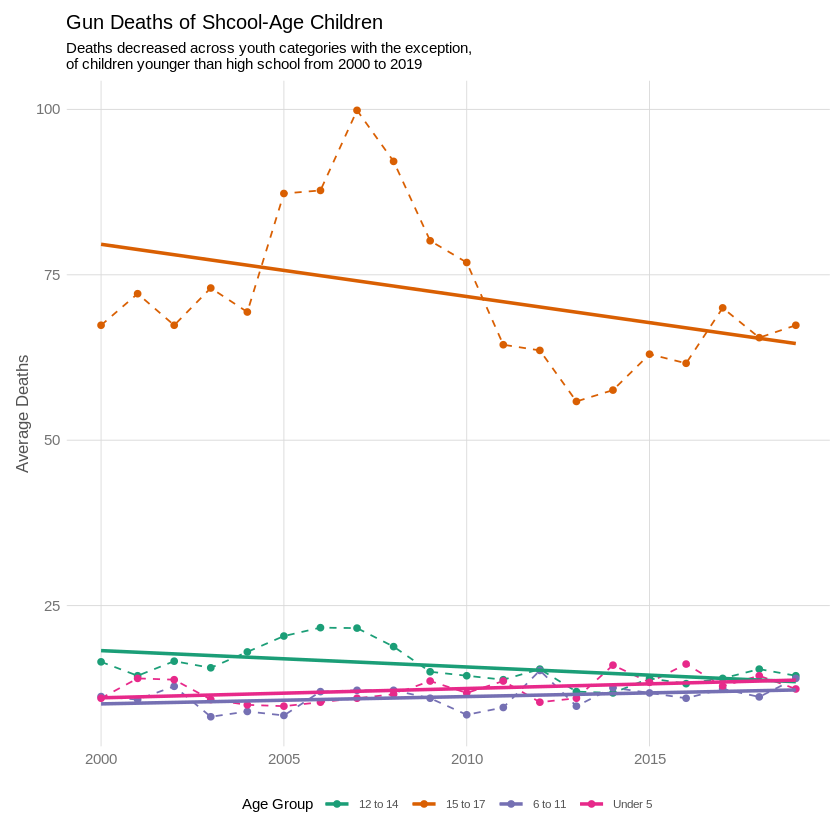

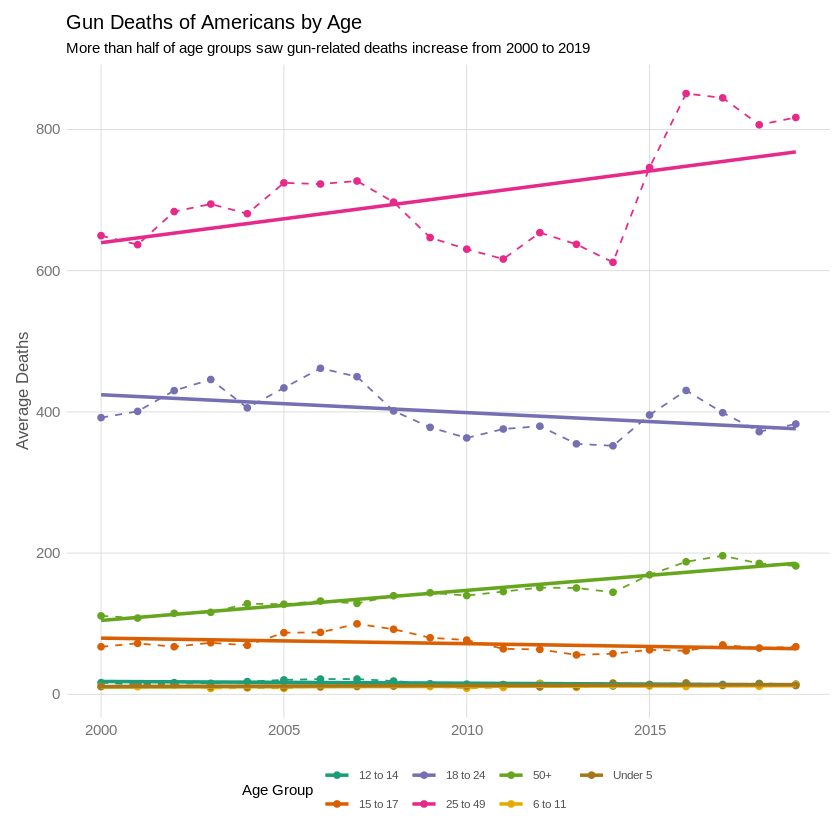

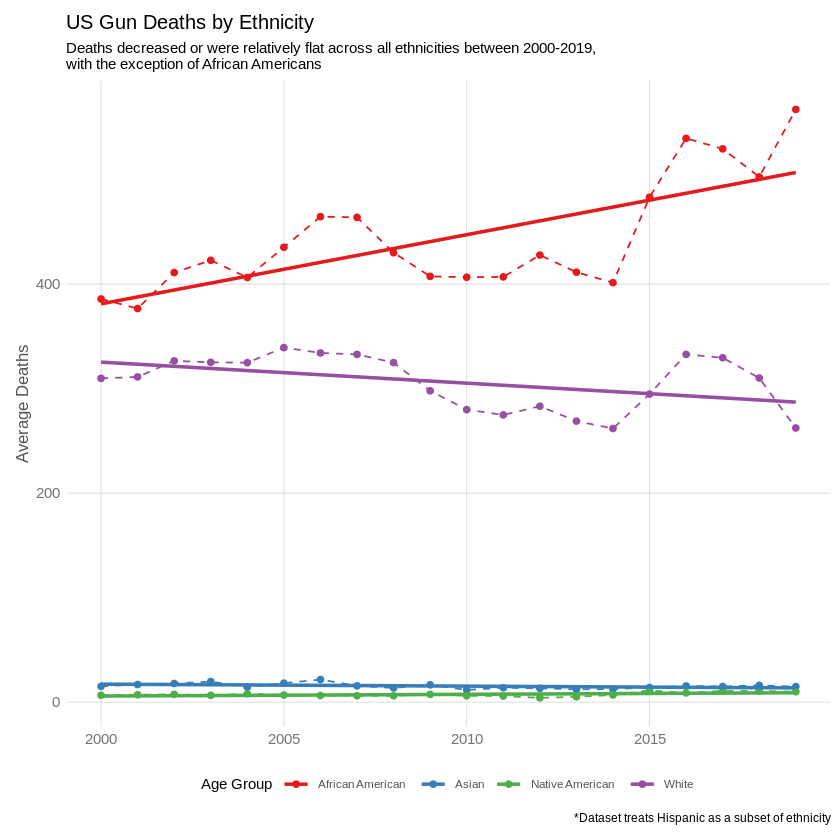

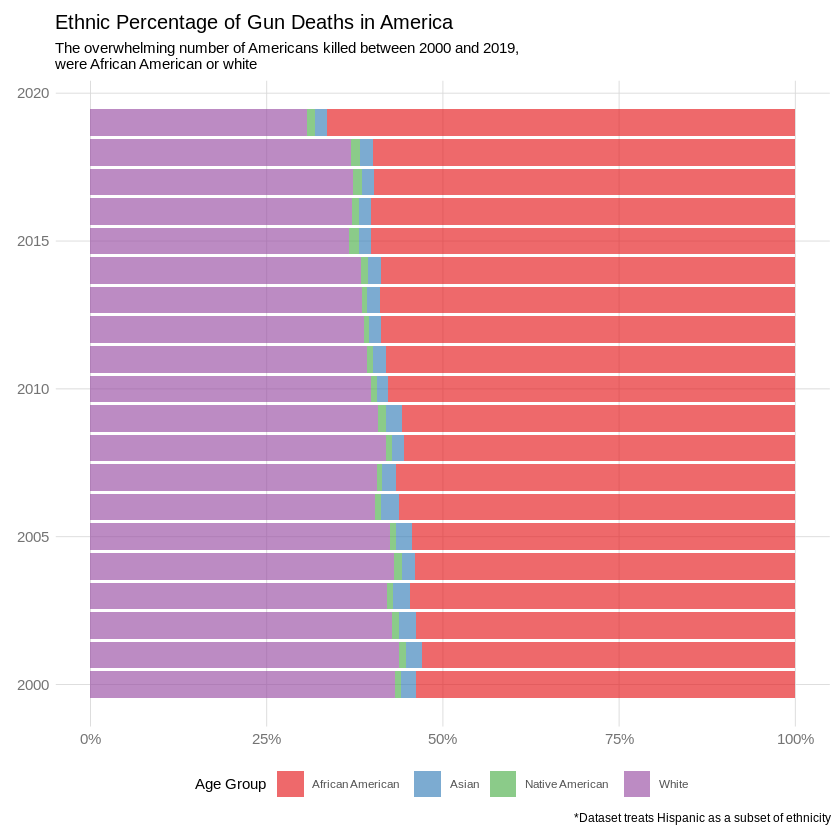

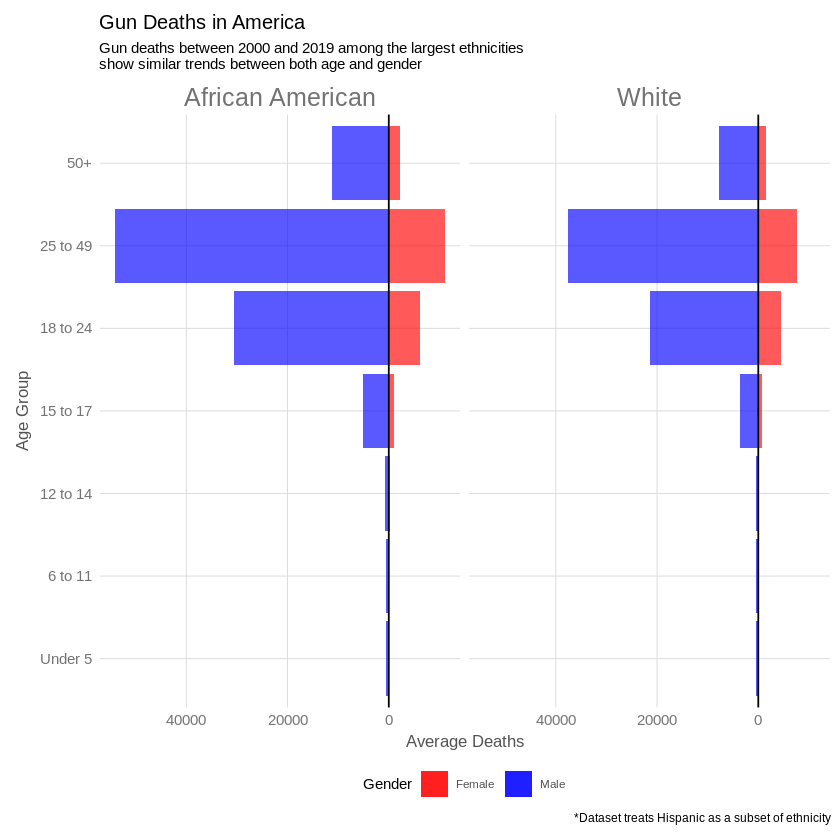

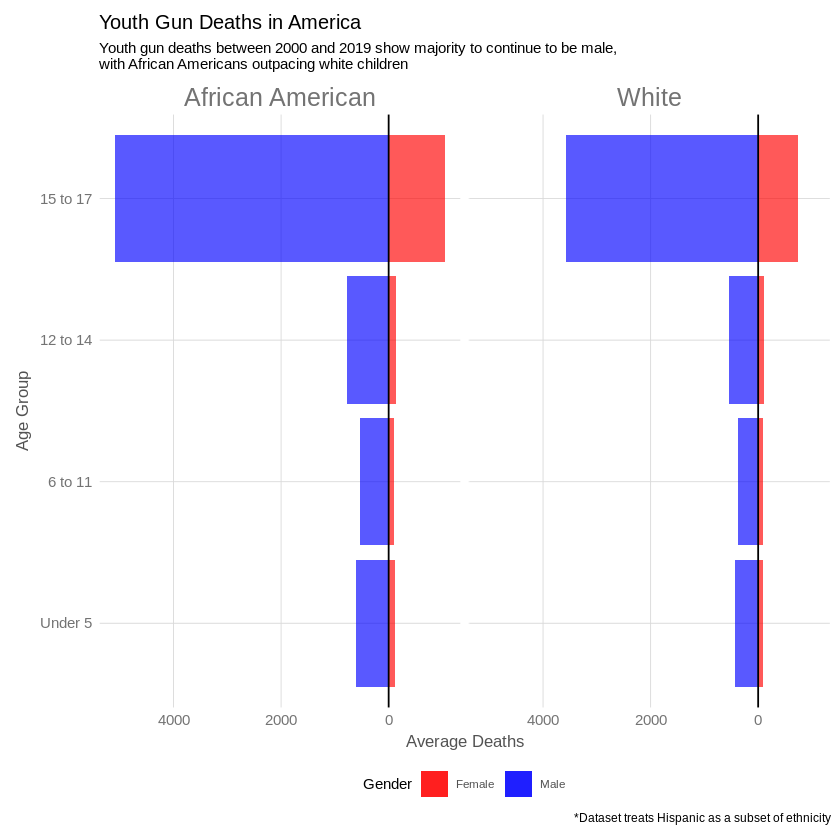

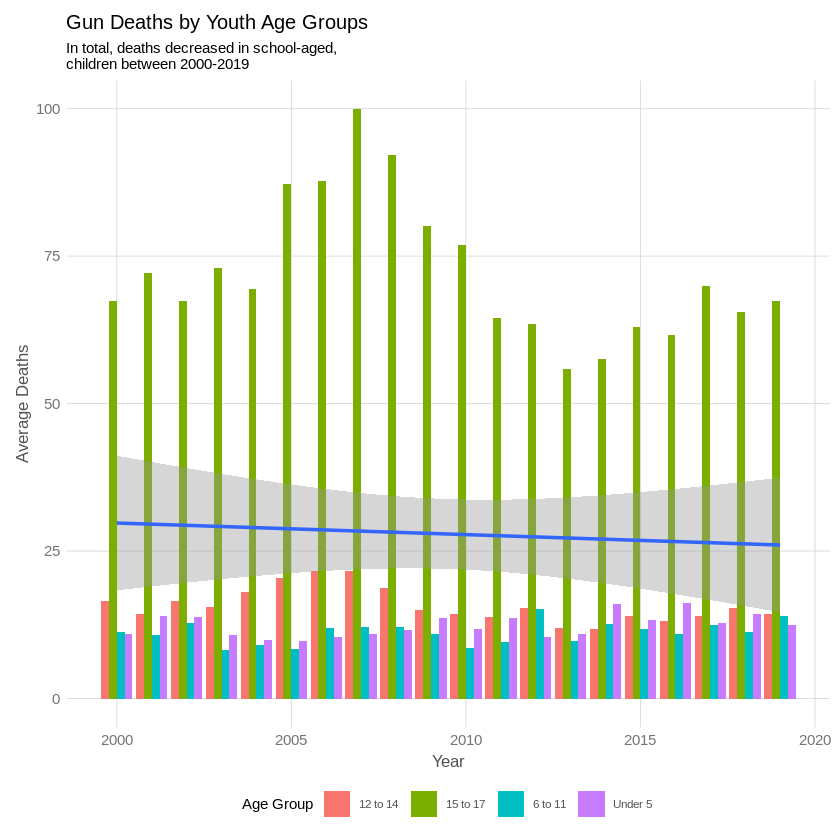

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

---

# Common Pitfalls / Inefficiencies

**BEFORE you submit your end product, pay attention to the following in your visualizations and story:**

---

### - Remember the design analysis questions:

**what, how, who, why?** 

- What are showing/telling? 
- How are you going to show it (efficiency? visual tasks like comparison, trends, query, etc.) 
- Who is your audience? Why should they care about what you have to tell? What are the **actionable** information they can take from your story? 
- Why are you telling the story? What is your angle, message, point? (make it clear in text AND visuals) 

---

### - Pay attention to the color schemes/palettes:

Do NOT use sequential palettes for data attributes that have no ordering; do NOT use qualitative color schemes for attributes where order matters. 

---

###  - Color coordinate among plots so that the same data attributes have the same color in all plots:

You can do that by creating a manual palette and use it everywhere to make sure same color is always assigned to the same attribute value (especially important for categories). Do not change color of the same category among plots!

---

###  - Perceptual grouping is important! group and/or order values:

People tend to make sense of things and compare better when they are ordered. 

- In a bar chart, **order the axes** by time, value, etc. to make comparisons more intuitive. 

- Pie chart: order wedges. 

- In a bubble map, if you want to show trends, use grouping variable to **connect** bubbles, etc. 

---

### - No lengthy text in x axis:

- **Flip** the axes of a bar chart so that string values (text) are readable on the y axis left to right, 

**or** 

- at least, put them slanted in x axis for better readibility. 

---

### - Plot only those that tell an obvious story:

**No crowded** scatter plots with useless linear regression lines that don't tell anything.  You do NOT have to plot ALL your data. Look at alternative plots to tell your story. **Also, look below:** 

---

### - If you have too many classes (discrete variables/categories), try to GROUP them:

- Instead of giving a color to each of the dozen or so categories, you can put them in meaningful groups and color code to reduce clutter. 

- For sequential variables, you can do the same thing by **binning** numbers into bins (like in a histogram). 

- **Stepped color palettes** may be more useful than smooth sequential palettes (especially for comparison in choropleth maps) for a large range of values in an attribute. 

- You can group/cluster data into meaningful chunks and display those as bubble charts, networks, geographical regions, etc. 

- Do NOT dump all the data in the plot unless there is a CLEAR pattern/clustering to it that can be perceived immediately. 

---

### - ANNOTATE! ANNOTATE! ANNOTATE!

- **Tell** your audience what they are supposed to see. 

- Use meaningful titles with a message, not dry titles. 

- Use nice and concise axis labels. 

- Use text annotations (look at the **examples in the lab notebook**).

---

### - THEMING

- **Good looking** charts are more **convincing**!

- **Almost NEVER use the default color palette, default theme, default font.**

- Use a subtle color scheme, nice fonts, interesting glyphs, etc. to make your charts look more **sophisticated**. 

---

### - Use space wisely!

- **Balance the plots** to use space effectively.

- Pay attention to **data-ink ratio**.

- **HAVE A FLOW left to right, top to bottom**. 